# Data Exploration 1 Assignment


## Imports and Connection

In [190]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [191]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

## Handle Missing Values

In [192]:
fill_list = ["ENROLL", 
            "TOTAL_REVENUE", 
            "FEDERAL_REVENUE", 
            "STATE_REVENUE", 
            "LOCAL_REVENUE", 
            "TOTAL_EXPENDITURE", 
            "INSTRUCTION_EXPENDITURE", 
            "SUPPORT_SERVICES_EXPENDITURE",
            "OTHER_EXPENDITURE", 
            "CAPITAL_OUTLAY_EXPENDITURE", 
            "GRADES_PK_G", 
            "GRADES_KG_G", 
            "GRADES_4_G", 
            "GRADES_8_G", 
            "GRADES_12_G", 
            "GRADES_1_8_G", 
            "GRADES_9_12_G", 
            "GRADES_ALL_G",
            "AVG_MATH_4_SCORE",
            "AVG_MATH_8_SCORE",
            "AVG_READING_4_SCORE",
            "AVG_READING_8_SCORE"]

years = education_df['YEAR'].unique()

education_df1 = education_df.copy()

### Fill in missing values via interpolation (since the data deals with time)

In [193]:
states = education_df["STATE"].unique()

for state in states:
    education_df1.loc[education_df1['STATE']==state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()
    
education_df1.dropna(inplace = True)

## Create Budget Deficit Column and Check for Outliers

In [194]:
education_df1['BUDGET_DEFICIT'] = education_df1['TOTAL_REVENUE'] - education_df1['TOTAL_EXPENDITURE']

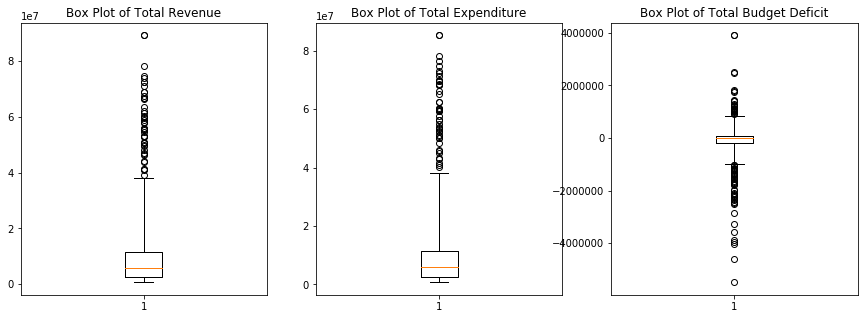

In [195]:
plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
plt.boxplot(education_df1['TOTAL_REVENUE'], whis = 3)
plt.title('Box Plot of Total Revenue')

plt.subplot(1,3,2)
plt.boxplot(education_df1['TOTAL_EXPENDITURE'], whis = 3)
plt.title('Box Plot of Total Expenditure')

plt.subplot(1,3,3)
plt.boxplot(education_df1['BUDGET_DEFICIT'], whis = 3)
plt.title('Box Plot of Total Budget Deficit')
plt.show()

## Winzorize Outliers

In [196]:
education_df2 = education_df1.copy()
education_df2['BUDGET_DEFICIT'] = winsorize(education_df2['BUDGET_DEFICIT'], (.05, .05))
education_df2['TOTAL_REVENUE'] = winsorize(education_df2['TOTAL_REVENUE'], (0, .05))
education_df2['TOTAL_EXPENDITURE'] = winsorize(education_df2['TOTAL_EXPENDITURE'], (0, .05))

### Confirm Outliers Have been Adjusted

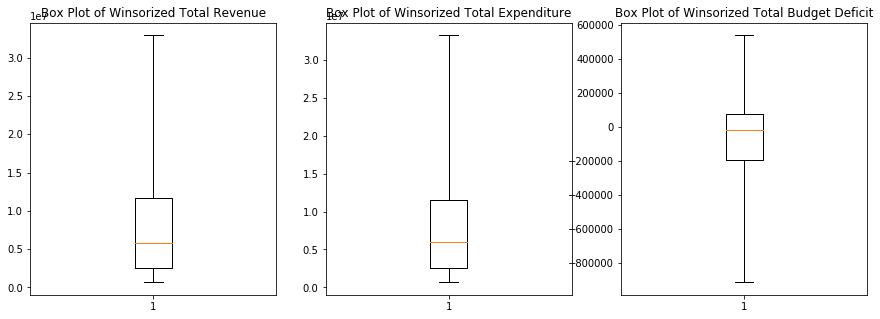

In [197]:
plt.figure(figsize = (15, 5))

plt.subplot(1,3,1)
plt.boxplot(education_df2['TOTAL_REVENUE'], whis = 3)
plt.title('Box Plot of Winsorized Total Revenue')

plt.subplot(1,3,2)
plt.boxplot(education_df2['TOTAL_EXPENDITURE'], whis = 3)
plt.title('Box Plot of Winsorized Total Expenditure')

plt.subplot(1,3,3)
plt.boxplot(education_df2['BUDGET_DEFICIT'], whis = 3)
plt.title('Box Plot of Winsorized Total Budget Deficit')
plt.show()

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [198]:
education_df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFICIT
count,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,...,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2006.970363,9.312498e+05,9.021812e+06,8.849582e+05,4.715139e+06,4.568873e+06,9.065171e+06,5.302625e+06,2.997572e+06,4.659259e+05,...,71677.377629,62567.048279,5.751591e+05,2.797579e+05,8.764167e+05,235.269162,278.747113,219.099817,263.615681,-67121.217017
std,6.242782,1.104296e+06,8.783126e+06,1.261405e+06,6.105385e+06,5.989616e+06,8.843292e+06,6.879720e+06,3.665806e+06,5.757227e+05,...,84302.592122,74919.819069,6.824060e+05,3.325605e+05,1.040403e+06,9.632646,9.912572,7.804302,5.768169,324443.529605
min,1993.000000,4.386600e+04,6.559710e+05,4.062200e+04,0.000000e+00,2.853100e+04,6.578090e+05,2.834840e+05,1.695450e+05,2.263600e+04,...,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,179.324956,236.379102,-913765.000000
25%,2002.000000,2.743105e+05,2.571806e+06,2.323988e+05,1.384262e+06,9.253550e+05,2.537691e+06,1.347766e+06,7.685512e+05,1.147892e+05,...,20564.750000,18304.000000,1.649732e+05,8.084075e+04,2.573745e+05,230.660761,273.383577,214.943439,259.956991,-194945.000000
50%,2007.000000,6.638440e+05,5.842360e+06,4.945290e+05,2.906463e+06,2.335014e+06,5.959529e+06,2.999999e+06,1.776351e+06,3.029990e+05,...,49774.000000,40743.000000,4.052340e+05,1.859055e+05,6.232765e+05,237.041971,280.862695,220.962973,264.517851,-15834.000000
75%,2012.000000,1.008680e+06,1.170678e+07,9.548370e+05,5.892033e+06,5.193129e+06,1.150621e+07,5.971732e+06,3.520381e+06,5.473685e+05,...,80671.250000,72551.000000,6.372388e+05,3.166840e+05,9.682915e+05,241.940254,285.257700,224.164324,267.663197,77363.500000
max,2017.000000,6.307022e+06,3.290896e+07,9.990221e+06,5.090457e+07,3.610526e+07,3.320145e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,540772.000000


Large variance in total revenue, budget  deficit. 

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [199]:
education_df2.loc[education_df2['STATE']=='CALIFORNIA'].head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFICIT
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,-278711.0
264,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,32908958.0,2850766.0,20560730.0,12203438.0,33201450.0,18160435.0,...,412604.0,317595.0,3591033.0,1578929.0,5246546.0,210.238093,262.622115,202.913590,268.021605,540772.0
316,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,32908958.0,3149260.0,22840500.0,13193258.0,33201450.0,20083913.0,...,424768.0,334852.0,3666271.0,1627284.0,5375481.0,211.347104,262.471753,203.914589,266.845758,540772.0
367,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,32908958.0,3599923.0,23695095.0,14098417.0,33201450.0,21110543.0,...,431730.0,347914.0,3734997.0,1675778.0,5496767.0,212.456114,262.321390,204.915588,265.669912,540772.0
420,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,32908958.0,4024940.0,26877920.0,15725347.0,33201450.0,23514388.0,...,441877.0,357789.0,3804640.0,1707952.0,5602511.0,213.565125,262.171027,205.916588,264.494066,540772.0
472,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,32908958.0,4280358.0,31374889.0,17633696.0,33201450.0,26641811.0,...,461133.0,365907.0,3871843.0,1745295.0,5717489.0,218.195077,263.797185,205.821871,261.353837,540772.0
524,2002_CALIFORNIA,CALIFORNIA,2002,6136915.0,32908958.0,5084409.0,31005317.0,18637330.0,33201450.0,28593157.0,...,473553.0,385181.0,3917027.0,1807054.0,5833345.0,222.825030,265.423343,205.727154,258.213609,-913765.0
576,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,32908958.0,5795655.0,33617766.0,20402434.0,33201450.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,5899326.0,227.454982,267.049501,205.632437,255.073380,65970.0
628,2004_CALIFORNIA,CALIFORNIA,2004,6284502.0,32908958.0,6634068.0,31756690.0,21771568.0,33201450.0,29624968.0,...,498806.0,409576.0,3897579.0,1915361.0,5932350.0,228.910970,267.803815,206.072232,259.628945,-913765.0
680,2005_CALIFORNIA,CALIFORNIA,2005,6307022.0,32908958.0,7148863.0,34912166.0,20110768.0,33201450.0,31070450.0,...,489560.0,423241.0,3848455.0,1953077.0,5926631.0,230.366957,268.558129,206.512026,264.184510,-913765.0


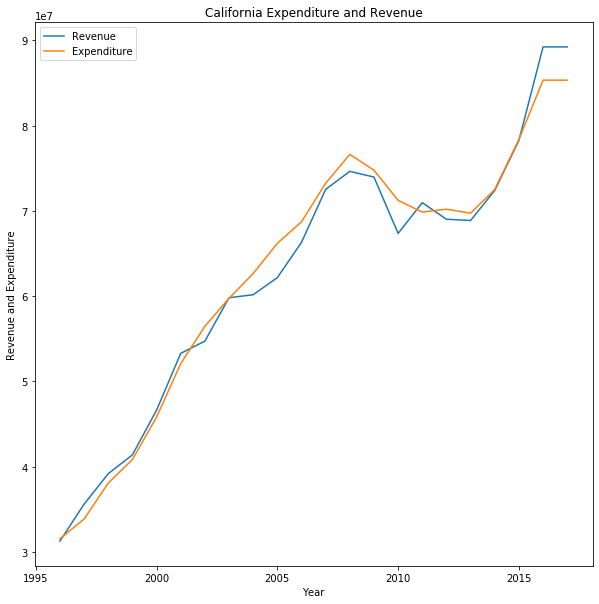

In [214]:
#Before revenue and expenditure were winzorized
plt.figure(figsize = (10, 10))

a = education_df1.loc[education_df1['STATE']=='CALIFORNIA', 'YEAR']
b = education_df1.loc[education_df1['STATE']=='CALIFORNIA', 'TOTAL_REVENUE']
plt.plot(a, b, label = 'Revenue')


x = education_df1.loc[education_df2['STATE']=='CALIFORNIA', 'YEAR']
y = education_df1.loc[education_df2['STATE']=='CALIFORNIA', 'TOTAL_EXPENDITURE']
plt.plot(x, y, label = 'Expenditure')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Revenue and Expenditure')
plt.title('California Expenditure and Revenue')

plt.show()

### The 2008 - 2012 dip is likely related to housing crisis in California. 

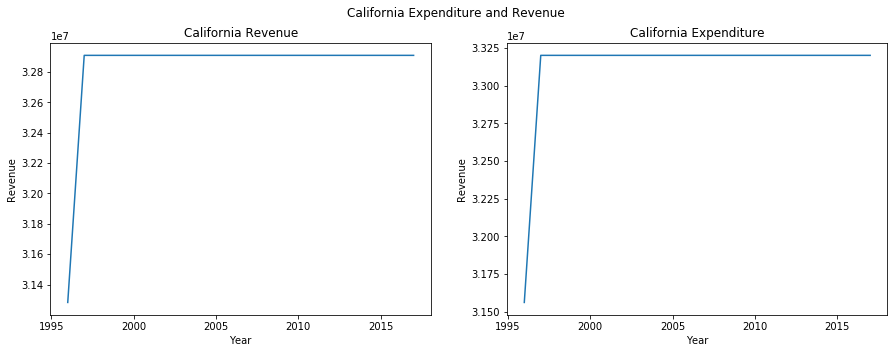

In [201]:
#After revenue and expenditure were winzorized
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
a = education_df2.loc[education_df1['STATE']=='CALIFORNIA', 'YEAR']
b = education_df2.loc[education_df1['STATE']=='CALIFORNIA', 'TOTAL_REVENUE']
plt.plot(a, b)
plt.title('California Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')


plt.subplot(1,2,2)
x = education_df2.loc[education_df2['STATE']=='CALIFORNIA', 'YEAR']
y = education_df2.loc[education_df2['STATE']=='CALIFORNIA', 'TOTAL_EXPENDITURE']
plt.plot(x, y)
plt.title('California Expenditure')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.suptitle('California Expenditure and Revenue')
plt.show()

### California's revenue and expenditure is an outlier for each year past 1995 - which explains the flat line after winzorization. 

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?

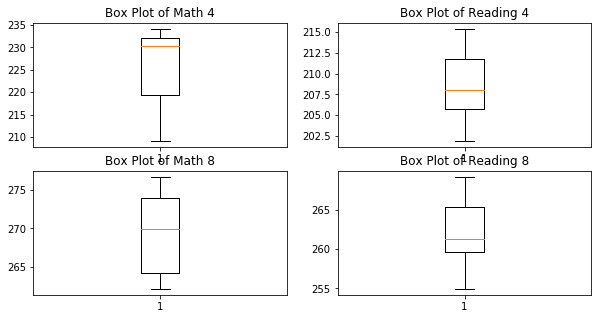

In [202]:
california_df = education_df1.loc[education_df1['STATE']=='CALIFORNIA']
plt.figure(figsize = (10, 5))

plt.subplot(2,2,1)
plt.boxplot(california_df['AVG_MATH_4_SCORE'], whis = 3)
plt.title('Box Plot of Math 4')

plt.subplot(2,2,2)
plt.boxplot(california_df['AVG_READING_4_SCORE'], whis = 3)
plt.title('Box Plot of Reading 4')

plt.subplot(2,2,3)
plt.boxplot(california_df['AVG_MATH_8_SCORE'], whis = 3)
plt.title('Box Plot of Math 8')

plt.subplot(2,2,4)
plt.boxplot(california_df['AVG_READING_8_SCORE'], whis = 3)
plt.title('Box Plot of Reading 8')
plt.show()

## Winzorize the data

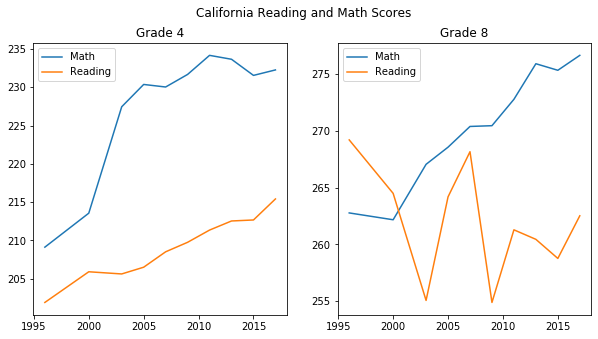

In [203]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.plot(california_df['YEAR'], california_df['AVG_MATH_4_SCORE'], label = 'Math')
plt.plot(california_df['YEAR'], california_df['AVG_READING_4_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.plot(california_df['YEAR'], california_df['AVG_MATH_8_SCORE'], label = 'Math')
plt.plot(california_df['YEAR'], california_df['AVG_READING_8_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 8')

plt.suptitle('California Reading and Math Scores')
plt.show()

### The students have higher scores in math for both grades. 

## 4. What are the distributions of the math and reading scores in the sample?

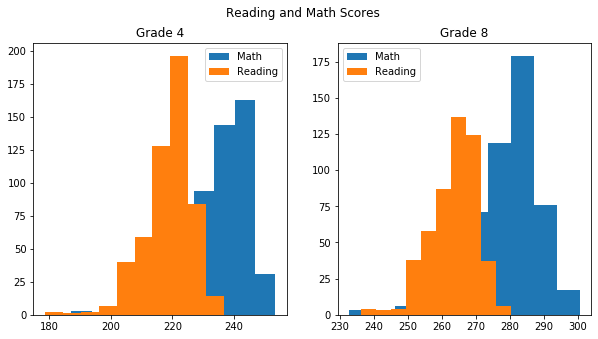

In [219]:
#Before missing data is filled in

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(education_df['AVG_MATH_4_SCORE'], label = 'Math')
plt.hist(education_df['AVG_READING_4_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.hist(education_df['AVG_MATH_8_SCORE'], label = 'Math')
plt.hist(education_df['AVG_READING_8_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 8')

plt.suptitle('Reading and Math Scores')
plt.show()


### These are normal distributions although slighly negatively skewed. 

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

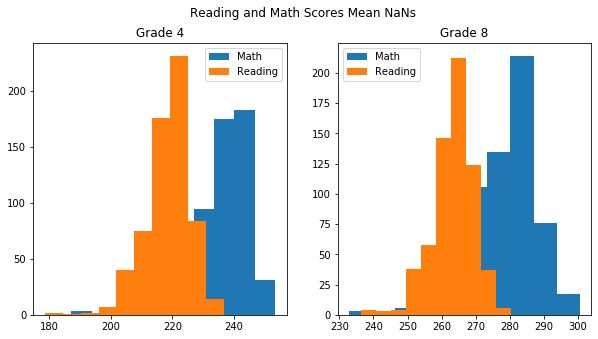

In [220]:
#After missing values are filled in via mean

education_df3 = education_df.copy()

years = education_df3["YEAR"].unique()

for col in fill_list:
    for year in years:
        education_df3.loc[education_df3["YEAR"] == year, col] = education_df3.loc[education_df3["YEAR"] == year, col].fillna(
            education_df3[education_df3["YEAR"] == year][col].mean())
        
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(education_df3['AVG_MATH_4_SCORE'], label = 'Math')
plt.hist(education_df3['AVG_READING_4_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.hist(education_df3['AVG_MATH_8_SCORE'], label = 'Math')
plt.hist(education_df3['AVG_READING_8_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 8')

plt.suptitle('Reading and Math Scores Mean NaNs')
plt.show()

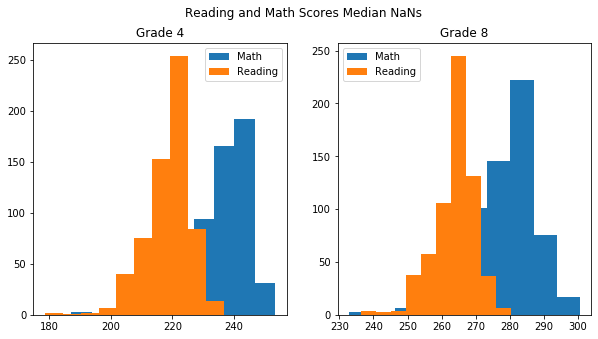

In [221]:
#After missing values are filled in via median

education_df4 = education_df.copy()

years = education_df4["YEAR"].unique()

for col in fill_list:
    for year in years:
        education_df4.loc[education_df4["YEAR"] == year, col] = education_df4.loc[education_df4["YEAR"] == year, col].fillna(
            education_df4[education_df4["YEAR"] == year][col].median())

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(education_df4['AVG_MATH_4_SCORE'], label = 'Math')
plt.hist(education_df4['AVG_READING_4_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.hist(education_df4['AVG_MATH_8_SCORE'], label = 'Math')
plt.hist(education_df4['AVG_READING_8_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 8')

plt.suptitle('Reading and Math Scores Median NaNs')
plt.show()

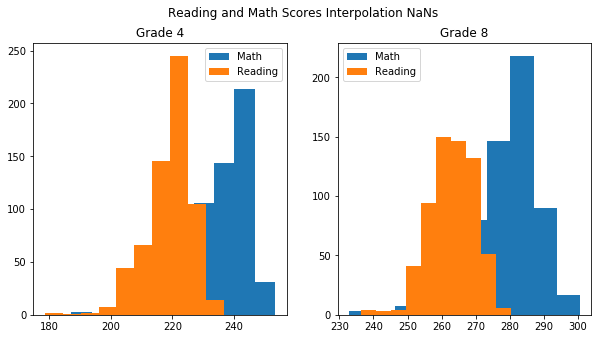

In [223]:
#After missing values are filled in via interpolation


education_df5 = education_df.copy()

years = education_df5["YEAR"].unique()

for col in fill_list:
    for year in years:
        education_df5.loc[education_df5["YEAR"] == year, col] = education_df5.loc[education_df5["YEAR"] == year, col].fillna(
            education_df5[education_df5["YEAR"] == year][col].interpolate())
        
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(education_df5['AVG_MATH_4_SCORE'], label = 'Math')
plt.hist(education_df5['AVG_READING_4_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 4')

plt.subplot(1,2,2)
plt.hist(education_df5['AVG_MATH_8_SCORE'], label = 'Math')
plt.hist(education_df5['AVG_READING_8_SCORE'], label = 'Reading')
plt.legend()
plt.title('Grade 8')

plt.suptitle('Reading and Math Scores Interpolation NaNs')
plt.show()

### Filling in with the median or mean has great effect on our distributions. There are so many missing values that it has a big effect. Interpolation is the best choice since it's time sensitive data. 